In [1]:
# !pip install xarray

# Dataset Download & Extraction:

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


In [3]:

# Load NetCDF dataset
# https://zenodo.org/records/11045944
file_path = "../data/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc"
dataset = xr.open_dataset(file_path)

# Check the dataset structure
dataset.dims, dataset.attrs['Conventions']

(FrozenMappingWarningOnValuesAccess({'n_filaments': 14374, 'box_dims': 4, 'n_max_pixels_fil': 2563, 'n_bands': 13}),
 'CF-1.6')

In [4]:

from datetime import datetime, timedelta, tzinfo, timezone
class DecimalTimeConversion:
    """
    A class to convert decimal year to datetime object.
    """

    @staticmethod
    def convert_dectime_to_date(year, rem=None):
        """
        Convert a decimal year to a datetime object.
        
        :param decimal_year: Decimal year (e.g., 2023.5 or 2023,5) or a tuple of two integers (e.g., (2023, 5))
        :return: Corresponding datetime object
        """
        # Handle input as a single float or two integers
        if rem is None:
            # If only one argument is provided, treat it as a float
            decimal_year = float(year)
            year = int(decimal_year)
            rem = decimal_year - year
        else:
            # If two arguments are provided, calculate rem from the second integer
            rem = rem / 10**len(str(rem))

        # Calculate the number of days in the year
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            days_in_year = 366
        else:
            days_in_year = 365
        
        # Calculate the number of seconds in the year and adjust for the decimal part
        seconds_in_year = days_in_year * 24 * 60 * 60
        base = datetime(year, 1, 1)
        date = base + timedelta(seconds=seconds_in_year * rem)
        return date

In [5]:
dataset

<xarray.Dataset> Size: 2GB
Dimensions:       (n_filaments: 14374, box_dims: 4, n_max_pixels_fil: 2563,
                   n_bands: 13)
Dimensions without coordinates: n_filaments, box_dims, n_max_pixels_fil, n_bands
Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...
Attributes: (12/22)
    title:                 Mediterranean Sentinel-2 Litter Windrows Catalogue...
    institution:           Barcelona Expert Center (BEC), ICM-CSIC, Barcelona...
    url:                   http://bec.icm.csic.es
    email:                 m.arias@icm.csic.es m.arias@zenithalblue.com
    copyright:             BEC research products are freely distributed. If t...
    reference:             https://doi.org/10.5281/zenodo.11045944
    ...                    ...
    geospatial_lat_max:    45.740728823657236
    geospatial_lat_units:  degrees north
    geospatial_lon_min:    -6.703167546213006
    geospatial_lon_max:    36.20086905862957
    geospatial_lon_units:  degrees east
    spectral_bands:        B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, ...

In [6]:
dataset['pixel_spec']

<xarray.DataArray 'pixel_spec' (n_filaments: 14374, n_max_pixels_fil: 2563,
                                n_bands: 13)> Size: 2GB
[478927306 values with dtype=float32]
Dimensions without coordinates: n_filaments, n_max_pixels_fil, n_bands
Attributes:
    long_name:    Pixel Spectra
    units:        reflectance
    description:  Spectral L1c (TOA) reflectance values for pixel and band on...

In [7]:
dataset.attrs['spectral_bands']

'B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B10, B11, B12'

In [8]:
len(dataset['s2_product'].values)

14374

In [9]:
s2_product=np.unique(dataset['s2_product'].values)
type(s2_product[0])

numpy.bytes_

In [10]:
s2_product_str = np.array([x.decode("utf-8") for x in s2_product])
s2_product_str

array(['S2A_MSIL1C_20150704T101006_N0204_R022_T32SMJ_20150704T101337.SAFE',
       'S2A_MSIL1C_20150704T101006_N0204_R022_T32TQR_20150704T101337.SAFE',
       'S2A_MSIL1C_20150704T101006_N0204_R022_T33TUL_20150704T101337.SAFE',
       ...,
       'S2B_MSIL1C_20210828T090549_N0301_R050_T35SLD_20210828T100806.SAFE',
       'S2B_MSIL1C_20210831T092029_N0301_R093_T34TFL_20210831T101845.SAFE',
       'S2B_MSIL1C_20210910T092029_N0301_R093_T34TGL_20210910T100629.SAFE'],
      dtype='<U65')

In [11]:
import pandas as pd
df=pd.DataFrame(s2_product_str, columns=["s2_product"])
df.to_csv("s2_product_unique.csv", index=False)

In [12]:
np.save

<function numpy.save(file, arr, allow_pickle=True, fix_imports=True)>

In [13]:
np.savetxt("s2_produuct_unique.csv",s2_product,delimiter=",",fmt="%s",header="s2_product",comments='')

In [14]:
change_time=DecimalTimeConversion()
change_time.convert_dectime_to_date(dataset['dec_time'].values[0])

datetime.datetime(2016, 2, 17, 11, 15, 2, 3)

In [15]:
dataset['limits'][0].values

array([2230., 2166., 2630., 2378.], dtype=float32)

In [16]:
dataset['pixel_x'][0].values

array([2170., 2171., 2171., ...,   nan,   nan,   nan], dtype=float32)

In [17]:
dataset.data_vars

Data variables:
    s2_product    (n_filaments) |S65 934kB b'S2A_MSIL1C_20160217T111122_N0201...
    dec_time      (n_filaments) float64 115kB 2.016e+03 2.016e+03 ... 2.021e+03
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...

In [18]:

dataset.data_vars['pixel_spec']
# dataset.data_vars['pixel_spec'].values

<xarray.DataArray 'pixel_spec' (n_filaments: 14374, n_max_pixels_fil: 2563,
                                n_bands: 13)> Size: 2GB
[478927306 values with dtype=float32]
Dimensions without coordinates: n_filaments, n_max_pixels_fil, n_bands
Attributes:
    long_name:    Pixel Spectra
    units:        reflectance
    description:  Spectral L1c (TOA) reflectance values for pixel and band on...

In [19]:
dataset.data_vars['pixel_spec'].attrs

{'long_name': 'Pixel Spectra',
 'units': 'reflectance',
 'description': 'Spectral L1c (TOA) reflectance values for pixel and band on the filament.'}

In [20]:
dataset.data_vars

Data variables:
    s2_product    (n_filaments) |S65 934kB b'S2A_MSIL1C_20160217T111122_N0201...
    dec_time      (n_filaments) float64 115kB 2.016e+03 2.016e+03 ... 2.021e+03
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...

# Visualization

<urlopen error [Errno 54] Connection reset by peer>
<urlopen error [Errno 54] Connection reset by peer>
<urlopen error [Errno 54] Connection reset by peer>
<urlopen error [Errno 54] Connection reset by peer>


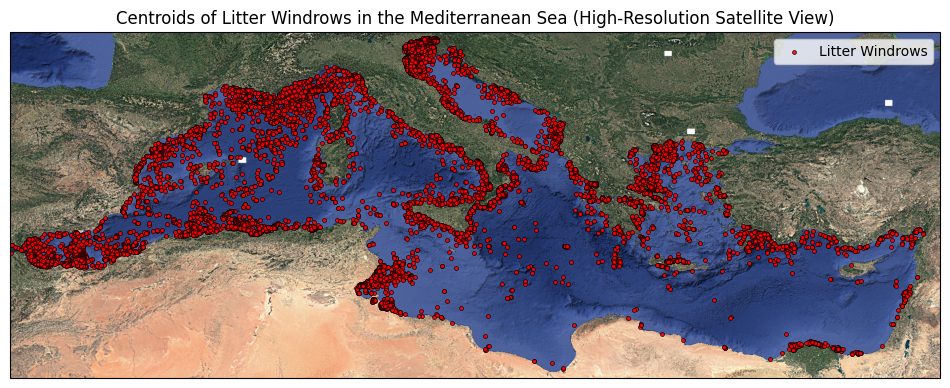

In [21]:


# Assuming dataset is a dictionary-like structure or xarray Dataset
lat_centroid = dataset['lat_centroid'].values
lon_centroid = dataset['lon_centroid'].values

# Define Mediterranean Sea boundaries
lat_min, lat_max = 30, 46
lon_min, lon_max = -6, 37

# Apply the mask
mask = (lat_centroid >= lat_min) & (lat_centroid <= lat_max) & \
       (lon_centroid >= lon_min) & (lon_centroid <= lon_max)

# Filtered data
lat_med = lat_centroid[mask]
lon_med = lon_centroid[mask]

# High-resolution ESRI satellite map
satellite = cimgt.GoogleTiles(style="satellite")  # You can change this to other providers below Note it will take around 2 Minutes to be processed 

# Create figure
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})



ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add satellite imagery as background
ax.add_image(satellite, 10)  # Higher zoom for better resolution (try to 10 for more detail)

# Scatter plot of centroids with improved visibility
ax.scatter(lon_med, lat_med, c='red', s=8, alpha=0.9, edgecolors="black", linewidth=0.5, transform=ccrs.PlateCarree(), label="Litter Windrows")

# Title and legend
ax.set_title("Centroids of Litter Windrows in the Mediterranean Sea (High-Resolution Satellite View)")
plt.legend()
plt.show()


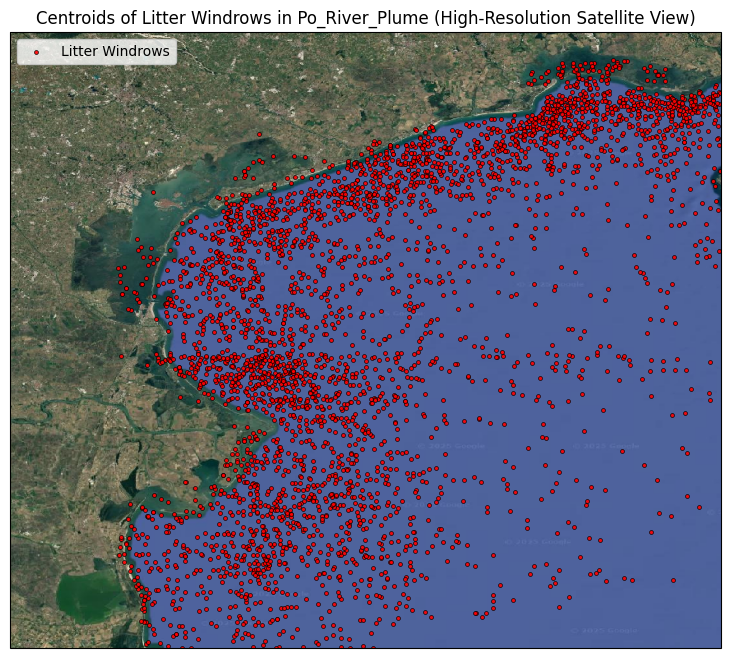

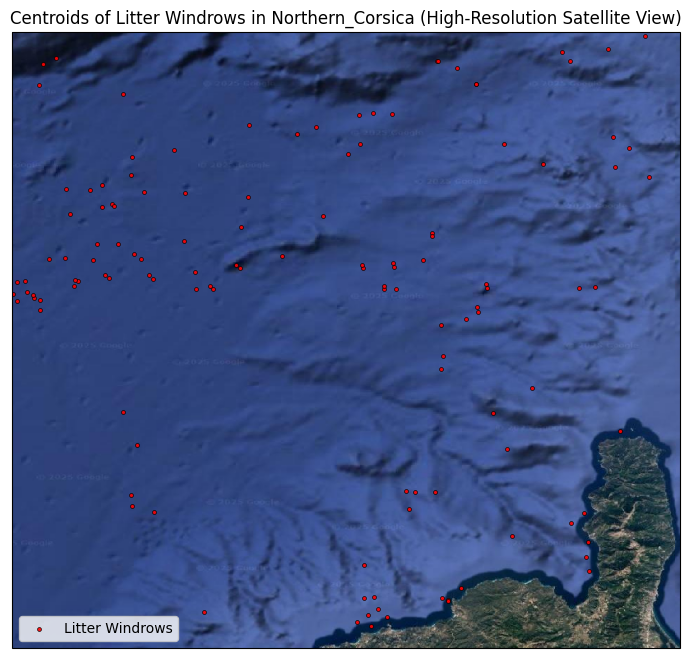

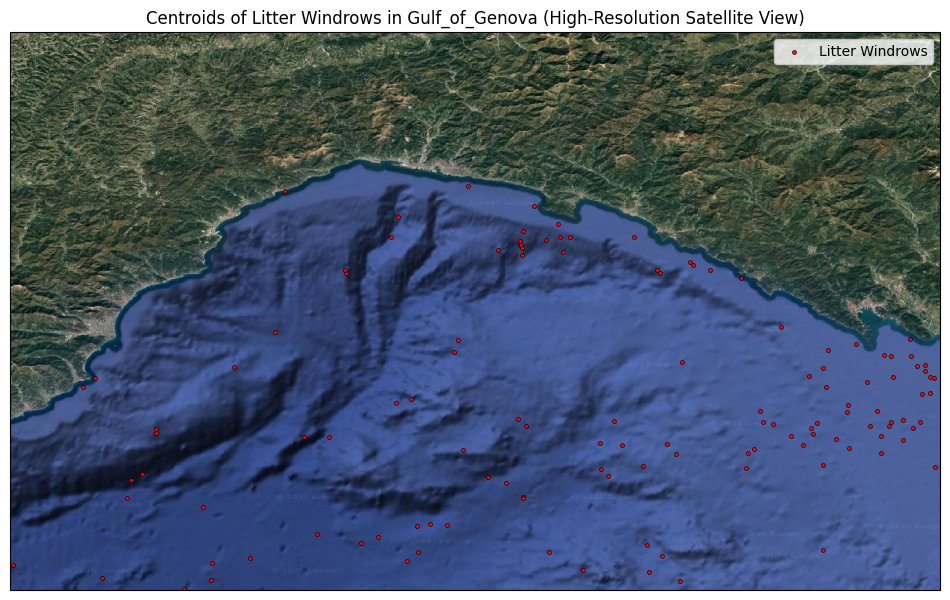

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Assuming dataset is a dictionary-like structure or xarray Dataset
lat_centroid = dataset['lat_centroid'].values
lon_centroid = dataset['lon_centroid'].values

# Define bounding boxes for regions
AOI_BBOXES = {
    'Po_River_Plume': [12.0, 44.5, 13.5, 45.8],   # Expanded to cover the plume further offshore
    'Northern_Corsica': [8.2, 42.6, 9.5, 43.8],   # Covers a larger coastal & offshore area
    'Gulf_of_Genova': [8.0, 43.5, 10.0, 44.7],    # Includes more of the Ligurian Sea
}

# Loop over all regions
for region, bbox in AOI_BBOXES.items():
    lon_min, lat_min, lon_max, lat_max = bbox

    # Apply the mask for each region
    mask = (lat_centroid >= lat_min) & (lat_centroid <= lat_max) & \
           (lon_centroid >= lon_min) & (lon_centroid <= lon_max)

    # Filtered data
    lat_region = lat_centroid[mask]
    lon_region = lon_centroid[mask]

    # High-resolution ESRI satellite map
    satellite = cimgt.GoogleTiles(style="satellite")  # You can change this to other providers below

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set extent based on the bounding box of the current region
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add satellite imagery as background
    ax.add_image(satellite, 10)  # Higher zoom for better resolution

    # Scatter plot of centroids with improved visibility
    ax.scatter(lon_region, lat_region, c='red', s=8, alpha=0.9, edgecolors="black", linewidth=0.5, transform=ccrs.PlateCarree(), label="Litter Windrows")

    # Title and legend
    ax.set_title(f"Centroids of Litter Windrows in {region} (High-Resolution Satellite View)")
    plt.legend()

    # Show the plot
    plt.show()


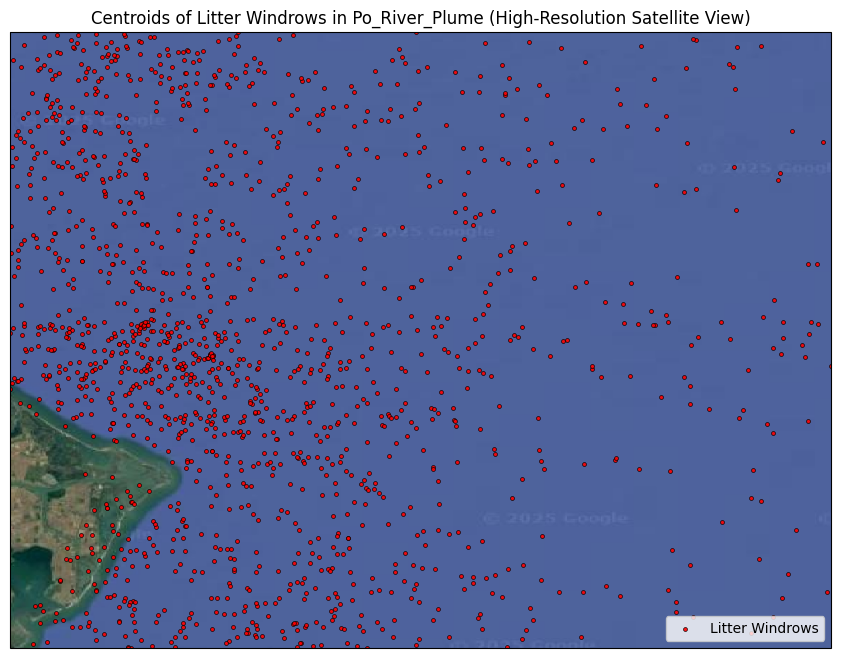

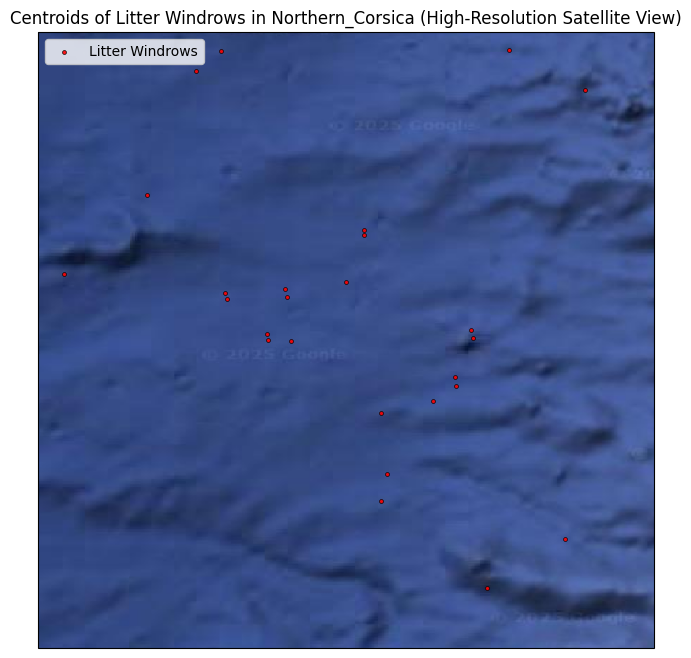

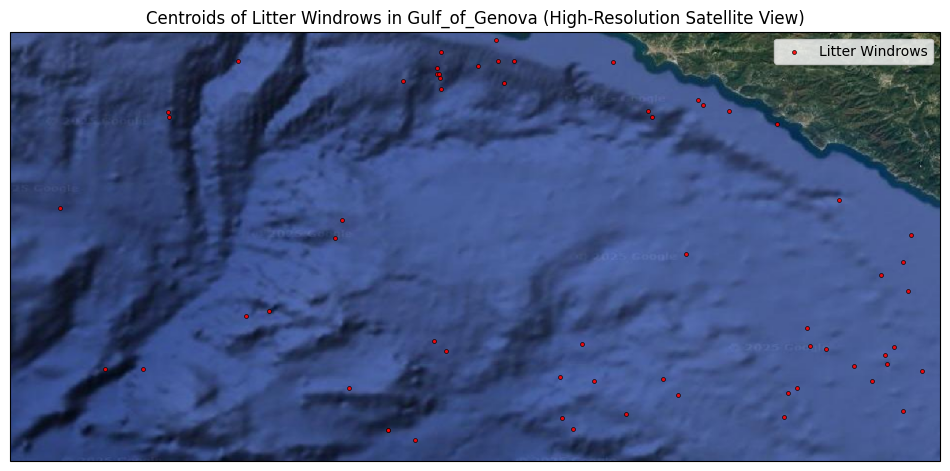

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Assuming dataset is a dictionary-like structure or xarray Dataset
lat_centroid = dataset['lat_centroid'].values
lon_centroid = dataset['lon_centroid'].values

# Define bounding boxes for regions
AOI_BBOXES = {
    'Po_River_Plume': [12.4, 44.8, 13.2, 45.4],   # Expanded to cover the plume further offshore
    'Northern_Corsica': [8.7, 43.0, 9.3, 43.6],   # Covers a larger coastal & offshore area
    'Gulf_of_Genova': [8.5, 43.7, 9.8, 44.3],    # Includes more of the Ligurian Sea
}

# Loop over all regions
for region, bbox in AOI_BBOXES.items():
    lon_min, lat_min, lon_max, lat_max = bbox

    # Apply the mask for each region
    mask = (lat_centroid >= lat_min) & (lat_centroid <= lat_max) & \
           (lon_centroid >= lon_min) & (lon_centroid <= lon_max)

    # Filtered data
    lat_region = lat_centroid[mask]
    lon_region = lon_centroid[mask]

    # High-resolution ESRI satellite map
    satellite = cimgt.GoogleTiles(style="satellite")  # You can change this to other providers below

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set extent based on the bounding box of the current region
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add satellite imagery as background
    ax.add_image(satellite, 10)  # Higher zoom for better resolution

    # Scatter plot of centroids with improved visibility
    ax.scatter(lon_region, lat_region, c='red', s=8, alpha=0.9, edgecolors="black", linewidth=0.5, transform=ccrs.PlateCarree(), label="Litter Windrows")

    # Title and legend
    ax.set_title(f"Centroids of Litter Windrows in {region} (High-Resolution Satellite View)")
    plt.legend()

    # Show the plot
    plt.show()


# Create a Binary masks

In [24]:
np.unique(dataset['pixel_spec'].values[0])

array([1.000e-04, 2.000e-04, 3.000e-04, 4.000e-04, 5.000e-04, 6.000e-04,
       7.000e-04, 8.000e-04, 9.000e-04, 1.100e-03, 1.200e-03, 1.300e-03,
       1.400e-03, 1.500e-03, 1.600e-03, 1.700e-03, 1.800e-03, 1.900e-03,
       2.000e-03, 2.100e-03, 2.200e-03, 2.300e-03, 2.400e-03, 2.500e-03,
       2.600e-03, 2.700e-03, 2.800e-03, 3.000e-03, 3.100e-03, 3.200e-03,
       3.300e-03, 3.400e-03, 3.500e-03, 3.600e-03, 3.800e-03, 3.900e-03,
       4.100e-03, 4.200e-03, 4.300e-03, 4.400e-03, 4.700e-03, 4.800e-03,
       5.000e-03, 5.100e-03, 5.200e-03, 5.600e-03, 5.700e-03, 5.800e-03,
       5.900e-03, 6.100e-03, 6.200e-03, 6.400e-03, 6.500e-03, 6.600e-03,
       6.800e-03, 7.000e-03, 7.200e-03, 7.400e-03, 1.380e-02, 1.390e-02,
       1.440e-02, 1.450e-02, 1.460e-02, 1.480e-02, 1.500e-02, 1.510e-02,
       1.520e-02, 1.530e-02, 1.540e-02, 1.550e-02, 1.560e-02, 1.570e-02,
       1.610e-02, 1.630e-02, 1.640e-02, 1.650e-02, 1.660e-02, 1.670e-02,
       1.690e-02, 1.700e-02, 1.710e-02, 1.720e-02, 

In [25]:
dataset['pixel_x'].values[0]

array([2170., 2171., 2171., ...,   nan,   nan,   nan], dtype=float32)

In [26]:
dataset['pixel_x'].values[0].shape

(2563,)

/var/folders/kc/yw8k7d7n6v3b4_rzwv4lfn7h0000gn/T/ipykernel_31636/1766827014.py:23: RuntimeWarning: invalid value encountered in cast
  rel_x = np.round(pixels_x - center_x + canvas_size // 2).astype(int)
/var/folders/kc/yw8k7d7n6v3b4_rzwv4lfn7h0000gn/T/ipykernel_31636/1766827014.py:24: RuntimeWarning: invalid value encountered in cast
  rel_y = np.round(pixels_y - center_y + canvas_size // 2).astype(int)


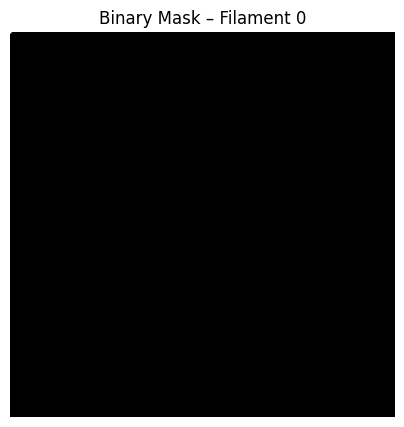

In [27]:

# Define the size of the mask canvas (centered around the filament)
canvas_size = 256 # pixels

# Get the centroid coordinates of the first filament
center_x = dataset['x_centroid'].values[0]
center_y = dataset['y_centroid'].values[0]

# Create an empty binary mask (all zeros)
mask = np.zeros((canvas_size, canvas_size), dtype=np.uint8)

# # Extract pixel coordinates and replace NaNs with 0
# pixels_x = np.nan_to_num(dataset['pixel_x'].values, nan=0)
# pixels_y = np.nan_to_num(dataset['pixel_y'].values, nan=0)

pixels_x = dataset['pixel_x'].values[3]
pixels_y = dataset['pixel_y'].values[3]

# Remove invalid pixel values (where pixel_x == -999)
valid_mask = pixels_x != -999
pixels_x, pixels_y = pixels_x[valid_mask], pixels_y[valid_mask]

# Offset coordinates to center the mask on the filament
rel_x = np.round(pixels_x - center_x + canvas_size // 2).astype(int)
rel_y = np.round(pixels_y - center_y + canvas_size // 2).astype(int)

# Ensure all pixel indices are within the valid range (inside the canvas)
valid_indices = (0 <= rel_x) & (rel_x < canvas_size) & (0 <= rel_y) & (rel_y < canvas_size)

# Set valid pixel locations to 1 in the binary mask
mask[rel_y[valid_indices], rel_x[valid_indices]] = 1

# Display the binary mask
plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask – Filament 0")
plt.axis('off')
plt.show()


In [28]:
valid_mask = pixels_x != -999
pixels_x, pixels_y = pixels_x[valid_mask], pixels_y[valid_mask]
pixels_x.shape

(2563,)

In [29]:
# Define bounding boxes for regions
AOI_BBOXES = {
    'Po_River_Plume': [12.0, 44.5, 13.5, 45.8],   # Expanded to cover the plume further offshore
    'Northern_Corsica': [8.2, 42.6, 9.5, 43.8],   # Covers a larger coastal & offshore area
    'Gulf_of_Genova': [8.0, 43.5, 10.0, 44.7],    # Includes more of the Ligurian Sea
}


filtered_filaments = {
    'Po_River_Plume': [],
    'Northern_Corsica': [],
    'Gulf_of_Genova': []
}

# Check which centroids fall in each AOI
lat = dataset['lat_centroid'].values
lon =dataset['lon_centroid'].values
for i in range(len(lat)):
    lat_i, lon_i = lat[i], lon[i]
    for aoi, (min_lon, min_lat, max_lon, max_lat) in AOI_BBOXES.items():
        if (min_lon <= lon_i <= max_lon) and (min_lat <= lat_i <= max_lat):
            filtered_filaments[aoi].append(i)

# Print summary
for aoi in filtered_filaments:
    print(f"{aoi}: {len(filtered_filaments[aoi])} filaments found")  

Po_River_Plume: 3833 filaments found
Northern_Corsica: 125 filaments found
Gulf_of_Genova: 126 filaments found


In [30]:
# Select AOI
aoi_name = 'Po_River_Plume'
filament_indices = filtered_filaments[aoi_name]

In [31]:
import os
import shutil
import numpy as np
import pandas as pd
import os
import shutil


output_dir = "./filtered_safe_lists"
source_safe_dir = "./SAVEFILES/"  # ضع هنا المسار الكامل لمجلد ملفات .SAFE
copy_safe_files = True
os.makedirs(output_dir, exist_ok=True)

AOI_BBOXES = {
    'Po_River_Plume': [12.0, 44.5, 13.5, 45.8],
    'Northern_Corsica': [8.2, 42.6, 9.5, 43.8],
    'Gulf_of_Genova': [8.0, 43.5, 10.0, 44.7],
}

ds = dataset
lat = ds['lat_centroid'].values
lon = ds['lon_centroid'].values
s2_products = ds['s2_product'].values.astype(str)

def is_in_bbox(lat, lon, bbox):
    min_lon, min_lat, max_lon, max_lat = bbox
    return (min_lon <= lon <= max_lon) and (min_lat <= lat <= max_lat)

for region, bbox in AOI_BBOXES.items():
    print(f"\n📍 Processing region: {region}")
    
    # تطبيق الفلترة
    mask = [is_in_bbox(la, lo, bbox) for la, lo in zip(lat, lon)]
    filtered_products = np.unique(s2_products[np.where(mask)])
    
    print(f"🟢 Found {len(filtered_products)} unique SAFE products in {region}")
    
    
    # حفظ إلى CSV
    csv_path = os.path.join(output_dir, f"{region}_SAFE_list.csv")
    pd.DataFrame(filtered_products, columns=["s2_product"]).to_csv(csv_path, index=False)
    
    # (اختياري) نسخ ملفات SAFE إلى مجلد جديد
    if copy_safe_files:
        target_dir = os.path.join(output_dir, f"{region}_SAFE_files")
        os.makedirs(target_dir, exist_ok=True)
        for prod in filtered_products:
            src_path = os.path.join(source_safe_dir, prod)
            dst_path = os.path.join(target_dir, prod)
            if os.path.exists(src_path):
                print(f"✅ Copying {prod}...")
                shutil.copytree(src_path, dst_path)
            else:
                print(f"⚠️ Not found: {prod}")




📍 Processing region: Po_River_Plume
🟢 Found 656 unique SAFE products in Po_River_Plume
⚠️ Not found: S2A_MSIL1C_20150704T101006_N0204_R022_T32TQR_20150704T101337.SAFE
⚠️ Not found: S2A_MSIL1C_20150704T101006_N0204_R022_T33TUL_20150704T101337.SAFE
⚠️ Not found: S2A_MSIL1C_20150711T100006_N0204_R122_T32TQQ_20150711T100008.SAFE
⚠️ Not found: S2A_MSIL1C_20150711T100006_N0204_R122_T32TQR_20150711T100008.SAFE
⚠️ Not found: S2A_MSIL1C_20150711T100006_N0204_R122_T33TUK_20150711T100008.SAFE
⚠️ Not found: S2A_MSIL1C_20150711T100006_N0204_R122_T33TUL_20150711T100008.SAFE
⚠️ Not found: S2A_MSIL1C_20150803T101016_N0204_R022_T32TQQ_20150803T101010.SAFE
⚠️ Not found: S2A_MSIL1C_20150803T101016_N0204_R022_T32TQR_20150803T101010.SAFE
⚠️ Not found: S2A_MSIL1C_20150803T101016_N0204_R022_T33TUL_20150803T101010.SAFE
⚠️ Not found: S2A_MSIL1C_20150813T101026_N0204_R022_T32TQR_20150813T101657.SAFE
⚠️ Not found: S2A_MSIL1C_20150813T101026_N0204_R022_T33TUL_20150813T101657.SAFE
⚠️ Not found: S2A_MSIL1C_2015082

In [32]:
filtered_products

array(['S2A_MSIL1C_20161016T101022_N0204_R022_T32TNP_20161016T101019.SAFE',
       'S2A_MSIL1C_20170226T102021_N0204_R065_T32TNP_20170226T102458.SAFE',
       'S2A_MSIL1C_20170315T101021_N0204_R022_T32TNP_20170315T101214.SAFE',
       'S2A_MSIL1C_20170328T102021_N0204_R065_T32TMP_20170328T102821.SAFE',
       'S2A_MSIL1C_20170517T102031_N0205_R065_T32TMP_20170517T102352.SAFE',
       'S2A_MSIL1C_20170517T102031_N0205_R065_T32TMQ_20170517T102352.SAFE',
       'S2A_MSIL1C_20170527T102031_N0205_R065_T32TMP_20170527T102301.SAFE',
       'S2A_MSIL1C_20170703T101021_N0205_R022_T32TNP_20170703T101041.SAFE',
       'S2A_MSIL1C_20170805T102031_N0205_R065_T32TNQ_20170805T102535.SAFE',
       'S2A_MSIL1C_20180323T102021_N0206_R065_T32TMQ_20180323T123106.SAFE',
       'S2A_MSIL1C_20180419T101031_N0206_R022_T32TNP_20180419T111252.SAFE',
       'S2A_MSIL1C_20180422T102031_N0206_R065_T32TMP_20180422T141352.SAFE',
       'S2A_MSIL1C_20180422T102031_N0206_R065_T32TMQ_20180422T141352.SAFE',
       'S2A_

In [33]:
# حفظ إلى CSV
    csv_path = os.path.join(output_dir, f"{region}_SAFE_list.csv")
    pd.DataFrame(filtered_products, columns=["s2_product"]).to_csv(csv_path, index=False)
    
    # (اختياري) نسخ ملفات SAFE إلى مجلد جديد
    if copy_safe_files:
        target_dir = os.path.join(output_dir, f"{region}_SAFE_files")
        os.makedirs(target_dir, exist_ok=True)
        for prod in filtered_products:
            src_path = os.path.join(source_safe_dir, prod)
            dst_path = os.path.join(target_dir, prod)
            if os.path.exists(src_path):
                print(f"✅ Copying {prod}...")
                shutil.copytree(src_path, dst_path)
            else:
                print(f"⚠️ Not found: {prod}")

IndentationError: unexpected indent (540995687.py, line 2)

# ACOLITE
**The ACOLITE** atmospheric correction tool was used in the **MARIDA dataset**, specifically applying the **Dark Spectrum Fitting (DSF) algorithm**. This correction was applied to Sentinel-2 Level-1C imagery to produce Rayleigh-corrected reflectance, which is equivalent to π·Rrs (i.e., the surface reflectance multiplied by π).

[Source](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0262247#sec020)

[ACOLITE Source installsion](https://github.com/acolite/acolite/releases)